<a href="https://colab.research.google.com/github/Jagritimaurya82/Spam_Ham_classifier/blob/main/Spam_Ham_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


# Importing Modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading and Exploring Dataset
**Reading in text data & why do we need to clean the text?**
While reading data, we get data in the structured or unstructured format. A structured format has a well-defined pattern whereas unstructured data has no proper structure. In between the 2 structures, we have a semi-structured format which is a comparably better structured than unstructured format.





In [7]:
# Read in the raw text
rawdata = open(r"/content/gdrive/MyDrive/Github_Repo/spam_ham_classifier/data/sms_spamcollection.tsv").read()
#printing raw data
rawdata[0:500]

"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\nham\tOk lar... Joking wif u oni...\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tU dun say so early hor... U c already then say...\nham\tNah I don't think he goes to usf, he lives around here though\nspam\tFreeMsg Hey there darling it's been 3 week's now and no word bac"

As we can see from above when we read semi-structured data it is hard to interpret so we use pandas to easily understand our data.

In [8]:
data  = pd.read_csv("/content/gdrive/MyDrive/Github_Repo/spam_ham_classifier/data/sms_spamcollection.tsv", sep="\t", names=["label", "body_text"], header=None)
data.head()

,label,body_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Pre-processing Data
Cleaning up the text data is necessary to highlight attributes that we’re going to want our machine learning system to pick up on. Cleaning (or pre-processing) the data typically consists of a number of steps:

## 1. Removing Punctuations
Punctuation can provide grammatical context to a sentence which supports our understanding. But for our vectorizer which counts the number of words and not the context, it does not add value, so we remove all special characters. eg: How are you?->How are you

In [10]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
# Function to remove punctuations.
def remove_punc(text):
    nonP_text = "".join([char for char in text if char not in string.punctuation])
    return nonP_text

data["body_text_clean"] = data["body_text"].apply(lambda x: remove_punc(x))

data.head()

,label,body_text,body_text_clean
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In body_text_clean, we can see that all punctuations like I’ve-> I’ve are omitted.

## 2. Tokenization
Tokenizing separates text into units such as sentences or words. It gives structure to previously unstructured text. eg: Plata o Plomo-> ‘Plata’,’o’,’Plomo’.

In [12]:
import re

#function to apply tokenization
def tokenize(text):
    tokens = re.split("\W+", text)# W+ means all capital, small alphabets and integers 0-9
    return tokens

data["body_text_tokenized"] = data["body_text_clean"].apply(lambda x: tokenize(x))

data.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l..."


In body_text_tokenized, we can see that all words are generated as tokens.

## 3. Remove Stopwords
Stopwords are common words that will likely appear in any text. They don’t tell us much about our data so we remove them. eg: silver or lead is fine for me-> silver, lead, fine.

In [17]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
def remove_stopwords(token):
    text = [word for word in token if word not in stopwords]# to remove all stopwords
    return text

data["body_text_nonstop"] = data["body_text_tokenized"].apply(lambda x: remove_stopwords(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nonstop
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around..."


In body_text_nostop, all unnecessary words like been, for, the are removed.

## 3. Stemming
Stemming helps reduce a word to its stem form. It often makes sense to treat related words in the same way. It removes suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. It reduces the corpus of words but often the actual words get neglected. eg: Entitling,Entitled->Entitl Note: Some search engines treat words with the same stem as synonyms.

In [19]:
ps = nltk.PorterStemmer()

def stemming(t_text):
    text = [ps.stem(word) for word in t_text]
    return text

data["body_text_stemmed"] = data["body_text_nonstop"].apply(lambda x: stemming(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, i, dont, think, goe, usf, live, around, ..."


In body_text_stemmed, words like entry,wkly is stemmed to entri,wkli even though don’t mean anything.

## 4. Lemmatizer
Lemmatizing derives the canonical form (‘lemma’) of a word. i.e the root form. It is better than stemming as it uses a dictionary-based approach i.e a morphological analysis to the root word.eg: Entitling, Entitled->Entitle In Short, Stemming is typically faster as it simply chops off the end of the word, without understanding the context of the word. Lemmatizing is slower and more accurate as it takes an informed analysis with the context of the word in mind.

In [21]:
import nltk
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(t_text):
    text = [wn.lemmatize(word) for word in t_text]
    return text

data["body_text_lemmatized"] = data["body_text_stemmed"].apply(lambda x: lemmatizer(x))
data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,label,body_text,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed,body_text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, i, dont, think, goe, usf, live, around, ...","[nah, i, dont, think, goe, usf, live, around, ..."


In body_text_stemmed, we can words like chances are lemmatized to chance whereas it is stemmed to chanc.

## Saving the cleaned Data

In [22]:
# We save the file as CSV 
# CSV(Comma-separated-value), It is easier to read compared to tsv(Tab-separated-value) and can be opened on Excel.
data.to_csv(r"/content/gdrive/MyDrive/Github_Repo/spam_ham_classifier/data/SMSSpamCollection_cleaned.csv", sep=',')

## Vectorizing Data: Bag-Of-Words

Vectorizing is the process of encoding text as integers i.e. numeric 
form to create feature vectors so that machine learning algorithms can understand our data.
Bag of Words (BoW) or CountVectorizer describes the presence of words within the text data. It gives a result of 1 if present in the sentence and 0 if not present. It, therefore, creates a bag of words with a document-matrix count in each text document.

 





In [25]:
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100) # To extend column width

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv(r"/content/gdrive/MyDrive/Github_Repo/spam_ham_classifier/data/sms_spamcollection.tsv", sep='\t')
data.columns = ['label', 'body_text']


In [26]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

## Apply Count Vectorizer
Encoding Text as integer i.e. numeric form to create feature vectors so that we can apply ML algos on it.

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(analyzer=clean_text)
x_count = count.fit_transform(data["body_text"])

x_count.shape
count.get_feature_names_out()

array(['', '0', '008704050406', ..., 'ü', 'üll', '〨ud'], dtype=object)

In [32]:
x_count_df = pd.DataFrame(x_count.toarray(), columns=count.get_feature_names_out())
x_count_df.head(10)

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Vectorize Raw Data: 
 **1. N Grams** :  N-grams are simply all combinations of adjacent words or letters of length n that we can find in our source text. Ngrams with n=1 are called unigrams. Similarly, bigrams (n=2), trigrams (n=3) and so on can also be used.
 Unigrams usually don’t contain much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the letter or word is likely to follow the given word. The longer the n-gram (higher n), the more context you have to work with.

## Apply CountVectorizer(N-Grams)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(2,2),analyzer=clean_text) # It applies only bigram vectorizer
X_counts = ngram_vect.fit_transform(data['body_text'])
print(X_counts.shape)
print(ngram_vect.get_feature_names_out())

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


(5571, 8107)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


In [35]:
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=ngram_vect.get_feature_names_out())
X_counts_df.head(10)

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. TF-IDF
It computes “relative frequency” that a word appears in a document compared to its frequency across all documents. It is more useful than “term frequency” for identifying “important” words in each document (high frequency in that document, low frequency in other documents). Note: Used for search engine scoring, text summarization, document clustering. Check my previous post — In the TF-IDF Section, I have elaborated on the working of TF-IDF.

TF-IDF is applied on the body_text, so the relative count of each word in the sentences is stored in the document matrix. (Check the repo). Note: Vectorizers outputs sparse matrices. Sparse Matrix is a matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements.
## Apply TFIDFvectorizer

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names_out())

(5571, 8107)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


In [38]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
X_tfidf_df.head(10)

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
print(X_tfidf_df.loc[(X_tfidf_df!=0).any(axis=1)])

             0  008704050406  0089mi  0121  01223585236  01223585334  \
0     0.0  0.0           0.0     0.0   0.0          0.0          0.0   
1     0.0  0.0           0.0     0.0   0.0          0.0          0.0   
2     0.0  0.0           0.0     0.0   0.0          0.0          0.0   
3     0.0  0.0           0.0     0.0   0.0          0.0          0.0   
4     0.0  0.0           0.0     0.0   0.0          0.0          0.0   
...   ...  ...           ...     ...   ...          ...          ...   
5566  0.0  0.0           0.0     0.0   0.0          0.0          0.0   
5567  0.0  0.0           0.0     0.0   0.0          0.0          0.0   
5568  0.0  0.0           0.0     0.0   0.0          0.0          0.0   
5569  0.0  0.0           0.0     0.0   0.0          0.0          0.0   
5570  0.0  0.0           0.0     0.0   0.0          0.0          0.0   

      0125698789   02  020603  ...  zindgi  zoe  zogtoriu  zoom  zouk  zyada  \
0            0.0  0.0     0.0  ...     0.0  0.0       0

## Feature Engineering: Feature Creation
Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. It is like an art as it requires domain knowledge and it can tough to create features, but it can be fruitful for ML algorithm to predict results as they can be related to the prediction.

In [40]:
import pandas as pd

data = pd.read_csv(r"/content/gdrive/MyDrive/Github_Repo/spam_ham_classifier/data/sms_spamcollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create feature for text message length and % of punctuation in text 

In [41]:
import string

# Function to calculate length of message excluding space
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))

data.head()

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

,label,body_text,body_len,punct%
0,ham,Ok lar... Joking wif u oni...,24,25.0
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
2,ham,U dun say so early hor... U c already then say...,39,15.4
3,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
4,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,116,6.9


body_len shows the length of words excluding whitespaces in a message body. punct% shows the percentage of punctuation marks in a message body.

#Check If Features are good or not

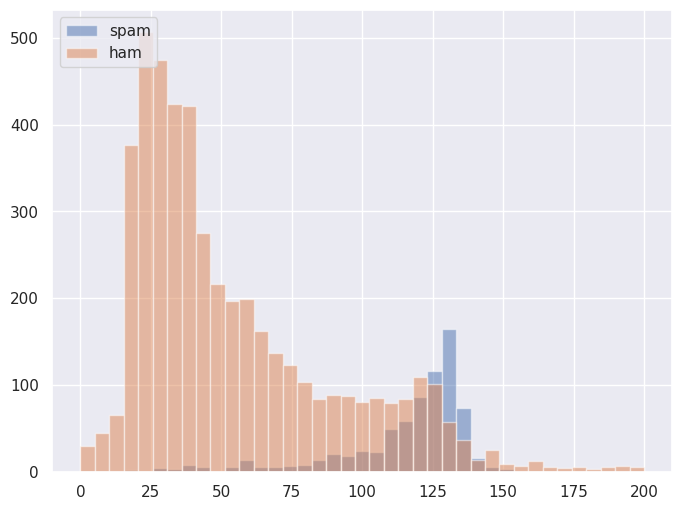

In [44]:
import seaborn as sns
#Setting the size and grid for plotting
sns.set(rc= {"figure.figsize": (8, 6)})

bins = np.linspace(0, 200, 40)

plt.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5, label='spam')
plt.hist(data[data['label']=='ham']['body_len'], bins, alpha=0.5, label='ham')
plt.legend(loc='upper left')
plt.show()

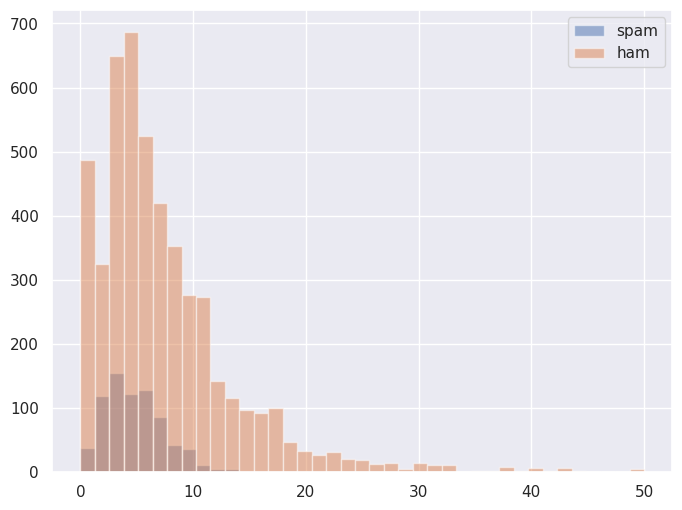

In [46]:
bins = np.linspace(0, 50, 40)

plt.hist(data[data['label']=='spam']['punct%'], bins, alpha=0.5, label='spam')
plt.hist(data[data['label']=='ham']['punct%'], bins, alpha=0.5, label='ham')
plt.legend(loc='upper right')
plt.show()

### Split into train/test

In [47]:
from sklearn.model_selection import train_test_split

X=data[['body_text', 'body_len', 'punct%']]
y=data['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Vectorize text

In [48]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['body_text'])

tfidf_train = tfidf_vect_fit.transform(X_train['body_text'])
tfidf_test = tfidf_vect_fit.transform(X_test['body_text'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,7211,7212,7213,7214,7215,7216,7217,7218,7219,7220
0,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,3.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,126,5.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,61,3.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Final evaluation of models

In [49]:
! pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ClassificationReport

In [52]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train_vect, y_train)

y_pred = rf_model.predict(X_test_vect)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}%'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred)*100, 3)))

sns.set(rc= {"figure.figsize": (8, 6)})

cm = confusion_matrix(y_test, y_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
ax = sns.heatmap(df_cm, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

TypeError: ignored

# Classification Reports

## 1. Using Heatmap

(5.0, 0.0)

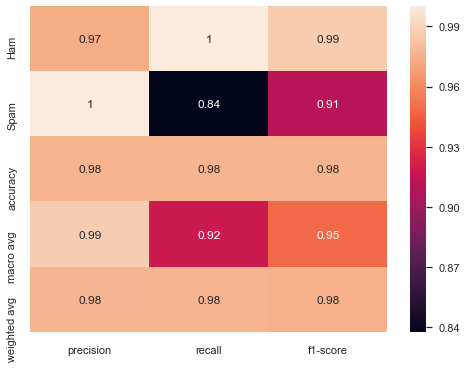

In [ ]:
true = np.random.randint(0, 10, size=100)
pred = np.random.randint(0, 10, size=100)
target_names = ["Ham", "Spam"]

clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=target_names,
                                   output_dict=True)

ax = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       955
        spam       1.00      0.84      0.91       160

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## 2. Using Yellowbrick Visualization

C:\Users\Samyak\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


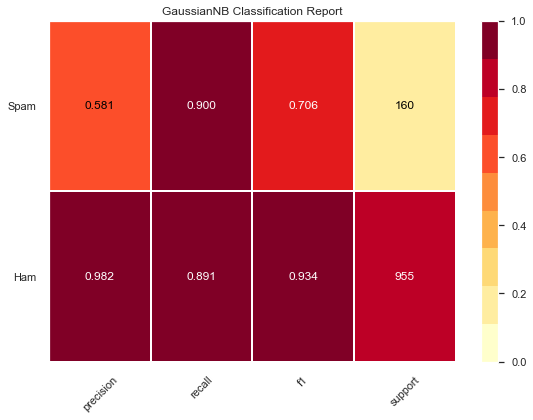

In [ ]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
classes = ["Ham", "Spam"]

bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes, support=True)

visualizer.fit(X_train_vect, y_train)  # Fit the visualizer and the model
visualizer.score(X_test_vect, y_test)  # Evaluate the model on the test data
visualizer.show()             # Draw/show the data